# Test

##### --Imports--

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### --Read CSV File--

In [74]:
df_GOOG = pd.read_csv("./data/GOOG.csv", index_col='Date', parse_dates=True, 
                        usecols = ['Date','Adj Close'], na_values=['nan'])
#print (df_GOOG.head(5))

##### --Plot Data--

In [120]:
#df_GOOG['Adj Close'].plot()
#plt.show()

##### --Create Empty DataFrame--

In [126]:
#dates = pd.date_range('2012-09-10', '2017-09-10')
#df = pd.DataFrame(index=dates)
#print (df.head(5))

##### --Read & Join More Stocks--

In [82]:
def get_data(symbols, df_date_range):
    df = pd.DataFrame(index=df_date_range)
    for symbol in symbols:
        df_temp = pd.read_csv("./data/{}.csv".format(symbol), index_col='Date', parse_dates=True,
                             usecols=['Date','Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})

        df = df.join(df_temp,sort=True)
        df = df.dropna()
        
    return df

In [106]:
dates = pd.date_range('2012-09-10', '2017-09-10')
df = get_data(['GOOG','AMZN','FB','AAPL'], dates)
print (df.head(5))

                  GOOG        AMZN         FB       AAPL
2012-09-10  349.076569  257.089996  18.809999  85.542564
2012-09-11  344.802582  255.669998  19.430000  85.265068
2012-09-12  344.150055  255.630005  20.930000  86.452538
2012-09-13  351.701721  260.239990  20.709999  88.155037
2012-09-14  353.514954  261.269989  22.000000  89.226341


##### --Data Slicing--

In [89]:
#Slice by row range(dates) using DataFrame.loc[]
#print (df.loc['2012-05-05':'2013-05-20'])

In [91]:
#Slice by columns(symbols)
#print (df[['GOOG','AAPL']])

In [117]:
#Slice by row and column
#print (df.loc['2013-05-09':'2014-05-20', ['GOOG','AAPL']])

##### --Ploting Multiple Stocks--

In [137]:
def plot_data(dataFrame, title="Stock Prices"):
    ax = dataFrame.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.show()

In [141]:
def plot_selected(dataFrame, columns, start_index, end_index):
    plot_data(dataFrame.loc[start_index:end_index, columns], title="Selected prices")

In [144]:
#plot_selected(df, ['AMZN','FB'], '2013-03-23', '2016-06-13')

##### --Normalising Data--

In [149]:
def normalise_data(dataFrame):
    return dataFrame/dataFrame.iloc[0]

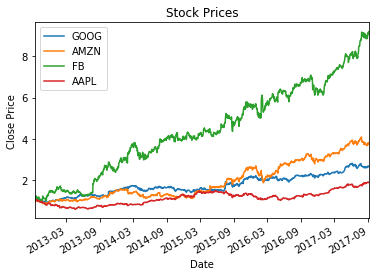

In [150]:
plot_data(normalise_data(df))